# Neural Networks 

# Variations of Backpropagation


# PART I : “Basic” Backpropagation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
df1 = pd.read_csv("C:/Users/DELL/Downloads/PROJECT3/PRJ3DATA/P_TR.csv",header=None)
df2 = pd.read_csv("C:/Users/DELL/Downloads/PROJECT3/PRJ3DATA/P_TS.csv",header=None)
df3 = pd.read_csv("C:/Users/DELL/Downloads/PROJECT3/PRJ3DATA/P_TT.csv",header=None)
df4 = pd.read_csv("C:/Users/DELL/Downloads/PROJECT3/PRJ3DATA/T_TR.csv",header=None)
df5 = pd.read_csv("C:/Users/DELL/Downloads/PROJECT3/PRJ3DATA/T_TS.csv",header=None)
df6 = pd.read_csv("C:/Users/DELL/Downloads/PROJECT3/PRJ3DATA/T_TT.csv",header=None)


In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

(47, 533)
(47, 67)
(47, 67)
(1, 533)
(1, 67)
(1, 67)


In [33]:
P_TR = df1.values
P_TS = df2.values
P_TT = df3.values
T_TR = df4.values
T_TS = df5.values
T_TT = df6.values
print(P_TR.shape)
print(P_TS.shape)
print(P_TT.shape)
print(T_TR.shape)
print(T_TS.shape)
print(T_TT.shape)

(47, 533)
(47, 67)
(47, 67)
(1, 533)
(1, 67)
(1, 67)


In [35]:
T_TR =  T_TR.flatten()
T_TS =  T_TS.flatten()
T_TT =  T_TT.flatten()

In [37]:
print(T_TR.shape)
print(T_TS.shape)
print(T_TT.shape)

(533,)
(67,)
(67,)


In [47]:
(P_TR.T).shape

(533, 47)

In [42]:
def tansig(x):
    return (2 / (1 + np.exp(-2*x))) - 1

def fdtansig(x):
    return 1 - (tansig(x)**2)

# Filter all warnings
warnings.filterwarnings("ignore")

## TRAINING  & VALIDATION With 2 Values of Alpha & 2 values of Hidden Units

In [84]:
# Set the number of input features, hidden units, and output units
num_input_units = 47
num_output_units = 1
alpha_values = [0.1, 0.005]

# Define a list of different numbers of hidden units to iterate over
hidden_units_values = [50, 100]  # You can add more values as needed

# Maximum number of training epochs
max_epochs = 100

# Initialize dictionaries to track Mean Squared Error 
mse_alpha_hidden = {}

# Filter all warnings
warnings.filterwarnings("ignore")

for alpha in alpha_values:
    for num_hidden_units in hidden_units_values:
        # Initialize weights and bias to zero for each alpha and hidden unit value
        # Initialize weights and biases for the hidden layer
        W1 = np.random.randn(num_hidden_units, num_input_units) / 6
        b1 = np.random.randn(num_hidden_units, 1) / 6  
        # Initialize weights and biases for the output layer
        W2 = np.random.randn(num_output_units, num_hidden_units) / 6
        b2 = np.random.randn(num_output_units, 1) / 6
        
        # Initialize dictionaries to track Mean Squared Error for this alpha and hidden unit value
        mse_values_train = []
        mse_values_val = []
        
        for epoch in range(max_epochs):
        # PHASE I - Training
            mse_train = 0  # Initialize training MSE for this epoch
            for i, p in enumerate(P_TR.T):
                # Forward propagation for training
                n1 = np.dot(W1, p).reshape(-1, 1) + b1
                a1 = tansig(n1)
                n2 = np.dot(W2, a1).reshape(-1, 1) + b2
                a2 = tansig(n2)
                error = T_TR[i] - a2
                s2 = (-2) * (fdtansig(a2) * error)
                s1 = fdtansig(a1) * np.outer(W2, s2)
                W2 = W2 - alpha * np.outer(s2, a1)
                b2 = b2 - alpha * s2.reshape(-1, 1)
                W1 = W1 - alpha * np.outer(s1, p)
                b1 = b1 - alpha * s1.reshape(-1, 1)
                mse_train = mse_train + (error ** 2)  # Accumulate training squared error
            
            # Calculate, store and print the average Training MSE for the epoch
            average_mse_train = mse_train / len(P_TR.T)
            mse_values_train.append(average_mse_train)
            np.set_printoptions(precision=30)
            print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")  
        
            # PHASE II - Validation
            mse_val = 0  # Initialize validation MSE for this epoch
            for i, p_val in enumerate(P_TT.T):
                # Forward propagation for validation
                n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
                a1_val = tansig(n1_val)
                n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
                a2_val = tansig(n2_val)
                error_val = T_TT[i] - a2_val
                mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

            # Calculate and store the average validation MSE for the epoch
            average_mse_val = mse_val / len(P_TT.T)
            mse_values_val.append(average_mse_val)
            print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")
        
        # Store the results for the current alpha
        mse_alpha_hidden[(alpha, num_hidden_units)] = {'train': mse_values_train, 'val': mse_values_val}
                

# Print the final MSE values for each alpha and hidden unit value
for (alpha, num_hidden_units), mse_values in mse_alpha_hidden.items():
    print(f"Final Training MSE for Alpha={alpha}, Hidden Units={num_hidden_units}: {mse_values['train'][-1]}")
    print(f"Final Validation MSE for Alpha={alpha}, Hidden Units={num_hidden_units}: {mse_values['val'][-1]}")



Epoch 1/100, Training MSE: [[0.9537537908102455]]
Epoch 1/100, Validation MSE: [[0.8133429143385804]]
Epoch 2/100, Training MSE: [[0.6633893241033842]]
Epoch 2/100, Validation MSE: [[0.8209646192100828]]
Epoch 3/100, Training MSE: [[0.6318093737000987]]
Epoch 3/100, Validation MSE: [[1.3873548954996375]]
Epoch 4/100, Training MSE: [[0.619633573590602]]
Epoch 4/100, Validation MSE: [[1.0719862764543844]]
Epoch 5/100, Training MSE: [[0.5627443527412581]]
Epoch 5/100, Validation MSE: [[1.3611573669823467]]
Epoch 6/100, Training MSE: [[0.5662336776119649]]
Epoch 6/100, Validation MSE: [[1.9023103728046298]]
Epoch 7/100, Training MSE: [[0.502593204226279]]
Epoch 7/100, Validation MSE: [[1.1890395956641988]]
Epoch 8/100, Training MSE: [[0.501037030746576]]
Epoch 8/100, Validation MSE: [[1.710528303256287]]
Epoch 9/100, Training MSE: [[0.4811971274416167]]
Epoch 9/100, Validation MSE: [[1.1781052950455415]]
Epoch 10/100, Training MSE: [[0.5022778618643416]]
Epoch 10/100, Validation MSE: [[1.0

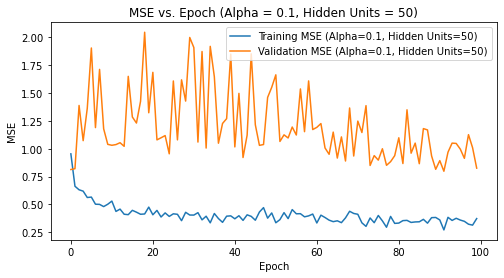

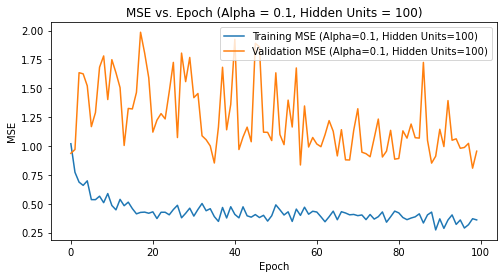

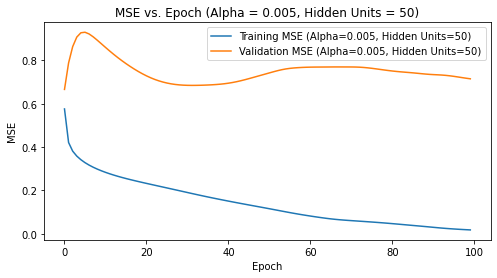

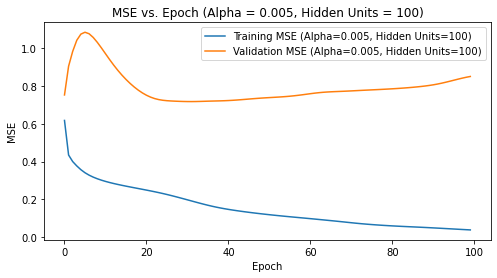

In [85]:
# Iterate over alpha values
for alpha in alpha_values:
    for num_hidden_units in hidden_units_values:
        plt.figure(figsize=(8, 4))  # Adjust the figure size if needed

        # Training MSE
        mse_train_array = np.array(mse_alpha_hidden[(alpha, num_hidden_units)]['train']).reshape(-1)
        plt.plot(range(len(mse_train_array)), mse_train_array, label=f'Training MSE (Alpha={alpha}, Hidden Units={num_hidden_units})')

        # Validation MSE
        mse_val_array = np.array(mse_alpha_hidden[(alpha, num_hidden_units)]['val']).reshape(-1)
        plt.plot(range(len(mse_val_array)), mse_val_array, label=f'Validation MSE (Alpha={alpha}, Hidden Units={num_hidden_units})')

        plt.xlabel("Epoch")
        plt.ylabel("MSE")
        plt.title(f"MSE vs. Epoch (Alpha = {alpha}, Hidden Units = {num_hidden_units})")
        plt.legend()

        plt.show()


In [87]:
alpha = 0.005
num_hidden_units = 50

# Maximum number of training epochs
max_epochs = 100

# Filter all warnings
warnings.filterwarnings("ignore")

# Initialize weights and bias
W1 = np.random.randn(num_hidden_units, num_input_units) / 6
b1 = np.random.randn(num_hidden_units, 1) / 6
W2 = np.random.randn(num_output_units, num_hidden_units) / 6
b2 = np.random.randn(num_output_units, 1) / 6

# Lists to store MSE values during training and validation
mse_values_train = []
mse_values_val = []

# Backpropagation training algorithm
for epoch in range(max_epochs):
    # PHASE I - Training
    mse_train = 0  # Initialize training MSE for this epoch
    for i, p in enumerate(P_TR.T):
        # Forward propagation for training
        n1 = np.dot(W1, p).reshape(-1, 1) + b1
        a1 = tansig(n1)
        n2 = np.dot(W2, a1).reshape(-1, 1) + b2
        a2 = tansig(n2)
        error = T_TR[i] - a2
        s2 = (-2) * (fdtansig(a2) * error)
        s1 = fdtansig(a1) * np.outer(W2, s2)
        W2 = W2 - alpha * np.outer(s2, a1)
        b2 = b2 - alpha * s2.reshape(-1, 1)
        W1 = W1 - alpha * np.outer(s1, p)
        b1 = b1 - alpha * s1.reshape(-1, 1)
        mse_train = mse_train + (error ** 2)  # Accumulate training squared error
    
    # Calculate and store the average Training MSE for the epoch
    average_mse_train = mse_train / len(P_TR.T)
    
    mse_values_train.append(average_mse_train)
    np.set_printoptions(precision=30)
    print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

    # PHASE II - Validation
    mse_val = 0  # Initialize validation MSE for this epoch
    correct = 0
    incorrect = 0
    for i, p_val in enumerate(P_TT.T):
        # Forward propagation for validation
        n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
        a1_val = tansig(n1_val)
        n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
        a2_val = tansig(n2_val)
        if a2_val < 0:
            output = -1
        else:
            output = 1
        if (T_TT[i] == output):
            correct = correct + 1
        else:
            incorrect = incorrect + 1
        error_val = T_TT[i] - a2_val
        mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

    # Calculate and store the average validation MSE for the epoch
    average_mse_val = mse_val / len(P_TT.T)
    mse_values_val.append(average_mse_val)
    print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

print(correct)
print(incorrect)
Hit_Ratio = correct/len(P_TT.T)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")
# Print the last Training and Validation MSE values
print(f"Last Training MSE for Alpha {alpha}: {mse_values_train[-1]}")
print(f"Last Validation MSE for Alpha {alpha}: {mse_values_val[-1]}")




Epoch 1/100, Training MSE: [[0.6358566279566248]]
Epoch 1/100, Validation MSE: [[0.6292883318826116]]
Epoch 2/100, Training MSE: [[0.44184113426154886]]
Epoch 2/100, Validation MSE: [[0.7437012097583908]]
Epoch 3/100, Training MSE: [[0.39925195319586915]]
Epoch 3/100, Validation MSE: [[0.8386730963654591]]
Epoch 4/100, Training MSE: [[0.37546119639919506]]
Epoch 4/100, Validation MSE: [[0.9046389099594949]]
Epoch 5/100, Training MSE: [[0.35883009579461356]]
Epoch 5/100, Validation MSE: [[0.9452804678936829]]
Epoch 6/100, Training MSE: [[0.3455258723121107]]
Epoch 6/100, Validation MSE: [[0.9628615341480196]]
Epoch 7/100, Training MSE: [[0.33439104373474515]]
Epoch 7/100, Validation MSE: [[0.963991225126665]]
Epoch 8/100, Training MSE: [[0.32474859804098566]]
Epoch 8/100, Validation MSE: [[0.9555639021327189]]
Epoch 9/100, Training MSE: [[0.3161880506361502]]
Epoch 9/100, Validation MSE: [[0.9421534615540923]]
Epoch 10/100, Training MSE: [[0.30844489954432963]]
Epoch 10/100, Validation 

In [82]:
len(P_TR.T)

533

## TRAINING & VALIDATION With Alpha = 0.005 and hidden units = 50 using TERMEPOCHS  

In [89]:
# Define the learning rate (alpha)
alpha = 0.005
num_hidden_units = 50

# Maximum number of training epochs
max_epochs = 100

# Number of epochs for early stopping
early_stop_epochs = 5

# Filter all warnings
warnings.filterwarnings("ignore")

# Initialize weights and bias
W1 = np.random.randn(num_hidden_units, num_input_units) / 6
b1 = np.random.randn(num_hidden_units, 1) / 6
W2 = np.random.randn(num_output_units, num_hidden_units) / 6
b2 = np.random.randn(num_output_units, 1) / 6

# Lists to store MSE values during training and validation
mse_values_train = []
mse_values_val = []

# Best validation MSE and corresponding model parameters
best_val_mse = float('inf')
best_W1 = None
best_b1 = None
best_W2 = None
best_b2 = None

# Backpropagation training algorithm
for epoch in range(max_epochs):
    # PHASE I - Training
    mse_train = 0  # Initialize training MSE for this epoch
    for i, p in enumerate(P_TR.T):
        # Forward propagation for training
        n1 = np.dot(W1, p).reshape(-1, 1) + b1
        a1 = tansig(n1)
        n2 = np.dot(W2, a1).reshape(-1, 1) + b2
        a2 = tansig(n2)
        error = T_TR[i] - a2
        s2 = (-2) * (fdtansig(a2) * error)
        s1 = fdtansig(a1) * np.outer(W2, s2)
        W2 = W2 - alpha * np.outer(s2, a1)
        b2 = b2 - alpha * s2.reshape(-1, 1)
        W1 = W1 - alpha * np.outer(s1, p)
        b1 = b1 - alpha * s1.reshape(-1, 1)
        mse_train = mse_train + (error ** 2)  # Accumulate training squared error
    
    # Calculate and store the average Training MSE for the epoch
    average_mse_train = mse_train / len(P_TR.T)
    mse_values_train.append(average_mse_train)
    np.set_printoptions(precision=30)
    print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

    # PHASE II - Validation
    mse_val = 0  # Initialize validation MSE for this epoch
    correct = 0
    incorrect = 0
    for i, p_val in enumerate(P_TT.T):
        # Forward propagation for validation
        n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
        a1_val = tansig(n1_val)
        n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
        a2_val = tansig(n2_val)
        if a2_val < 0:
            output = -1
        else:
            output = 1
        if (T_TT[i] == output):
            correct = correct + 1
        else:
            incorrect = incorrect + 1
        error_val = T_TT[i] - a2_val
        mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

    # Calculate and store the average validation MSE for the epoch
    average_mse_val = mse_val / len(P_TT.T)
    mse_values_val.append(average_mse_val)
    print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

    # Check for early stopping based on validation MSE
    if epoch > early_stop_epochs and (average_mse_val >= mse_values_val[-early_stop_epochs:]).all():
        print(f"Early stopping at Epoch {epoch + 1}, Best Validation MSE: {best_val_mse}")
        break

    # Update the best model if the current model has a lower validation MSE
    if average_mse_val < best_val_mse:
        best_val_mse = average_mse_val
        best_W1 = np.copy(W1)
        best_b1 = np.copy(b1)
        best_W2 = np.copy(W2)
        best_b2 = np.copy(b2)

print(correct)
print(incorrect)
Hit_Ratio = correct/len(P_TT.T)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")
# Print the final MSE values for the best model
print(f"Final Training MSE for the Best Model: {mse_values_train[-1]}")
print(f"Final Validation MSE for the Best Model: {best_val_mse}")




Epoch 1/100, Training MSE: [[0.6329381334993722]]
Epoch 1/100, Validation MSE: [[0.6796185888712893]]
Epoch 2/100, Training MSE: [[0.45060709310428854]]
Epoch 2/100, Validation MSE: [[0.7876595071826958]]
Epoch 3/100, Training MSE: [[0.3994159220055527]]
Epoch 3/100, Validation MSE: [[0.8522820711818313]]
Epoch 4/100, Training MSE: [[0.37074041457478085]]
Epoch 4/100, Validation MSE: [[0.8904537206331865]]
Epoch 5/100, Training MSE: [[0.3522390168270802]]
Epoch 5/100, Validation MSE: [[0.9110954207068317]]
Epoch 6/100, Training MSE: [[0.3382062149749157]]
Epoch 6/100, Validation MSE: [[0.9177394782477926]]
Epoch 7/100, Training MSE: [[0.3268182079957585]]
Epoch 7/100, Validation MSE: [[0.9146256352866948]]
Epoch 8/100, Training MSE: [[0.31720940561611694]]
Epoch 8/100, Validation MSE: [[0.9057013881533309]]
Epoch 9/100, Training MSE: [[0.30885377430981054]]
Epoch 9/100, Validation MSE: [[0.8936586062785439]]
Epoch 10/100, Training MSE: [[0.301423430255905]]
Epoch 10/100, Validation MSE

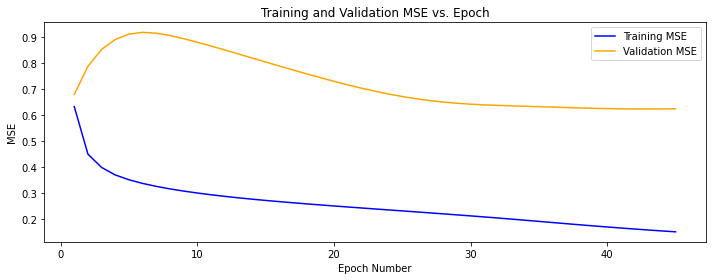

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming mse_values_train and mse_values_val are numpy arrays
mse_values_train = np.ravel(mse_values_train)
mse_values_val = np.ravel(mse_values_val)

# Plotting the learning curves
plt.figure(figsize=(10, 4))

# Plot training and validation MSE curves
plt.plot(range(1, len(mse_values_train) + 1), mse_values_train, label='Training MSE', color='blue')
plt.plot(range(1, len(mse_values_val) + 1), mse_values_val, label='Validation MSE', color='orange')

plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.title('Training and Validation MSE vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()


## TESTING for PART I

In [91]:
# Evaluate the best model on the test set
mse_test = 0
correct = 0;
incorrect = 0;
for i, p_test in enumerate(P_TS.T):
    # Forward propagation for testing using the best model
    n1_test = np.dot(best_W1, p_test).reshape(-1, 1) + best_b1
    a1_test = tansig(n1_test)
    n2_test = np.dot(best_W2, a1_test).reshape(-1, 1) + best_b2
    a2_test = tansig(n2_test)
    if a2_test < 0:
        output = -1
    else:
        output = 1
    if (T_TS[i] == output):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
    error_test = T_TS[i] - a2_test
    mse_test = mse_test + (error_test ** 2)  # Accumulate testing squared error

# Calculate and print the average testing MSE for the best model
average_mse_test = mse_test / len(P_TS.T)
print(f"Final Test MSE for the Best Model: {average_mse_test}")
print(correct)
print(incorrect)
Hit_Ratio = correct/len(P_TS.T)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Final Test MSE for the Best Model: [[0.453761080352756]]
58
9
0.8656716417910447
Accuracy: 86.57%


## PART II: Backpropagation with Momentum

##  TRAINING  & VALIDATION With 2 Values of Alpha & 2 values of Hidden Units & 2 values of Gamma

In [150]:
# Set the number of input features, hidden units, and output units
num_input_units = 47
num_output_units = 1

# Define a list of different numbers of hidden units to iterate over
hidden_units_values = [50, 100]  # You can add more values as needed

# Maximum number of training epochs
max_epochs = 100

# Define a list of alpha and gamma values to experiment with
alpha_values = [0.01, 0.0001]
gamma_values = [0.9, 0.99]  # Experiment with different momentum values

# Initialize dictionaries to track Mean Squared Error
mse_alpha_hidden_momentum = {}

# Filter all warnings
warnings.filterwarnings("ignore")

for alpha in alpha_values:
    for gamma in gamma_values:
        for num_hidden_units in hidden_units_values:
            # Initialize weights, bias, and momentum for each alpha, gamma, and hidden unit value
            # Initialize weights and biases for the hidden layer
            W1 = np.random.randn(num_hidden_units, num_input_units) / 6
            b1 = np.random.randn(num_hidden_units, 1) / 6
            # Initialize weights and biases for the output layer
            W2 = np.random.randn(num_output_units, num_hidden_units) / 6
            b2 = np.random.randn(num_output_units, 1) / 6

            # Initialize momentum terms for each weight and bias
            W1_momentum = np.zeros_like(W1)
            b1_momentum = np.zeros_like(b1)
            W2_momentum = np.zeros_like(W2)
            b2_momentum = np.zeros_like(b2)

            # Initialize dictionaries to track Mean Squared Error for this alpha, gamma, and hidden unit value
            mse_values_train = []
            mse_values_val = []

            for epoch in range(max_epochs):
                # PHASE I - Training
                mse_train = 0  # Initialize training MSE for this epoch
                for i, p in enumerate(P_TR.T):
                    # Forward propagation for training
                    n1 = np.dot(W1, p).reshape(-1, 1) + b1
                    a1 = tansig(n1)
                    n2 = np.dot(W2, a1).reshape(-1, 1) + b2
                    a2 = tansig(n2)
                    error = T_TR[i] - a2
                    s2 = (-2) * (fdtansig(a2) * error)
                    s1 = fdtansig(a1) * np.outer(W2, s2)

                    # Calculate momentum updates
                    W1_momentum = (gamma * W1_momentum) + ((1-gamma)*(alpha * np.outer(s1, p)))
                    b1_momentum = gamma * b1_momentum + ((1-gamma)*(alpha * s1.reshape(-1, 1)))
                    W2_momentum = (gamma * W2_momentum) + ((1-gamma)*(alpha * np.outer(s2, a1)))
                    b2_momentum = gamma * b2_momentum + ((1-gamma)*(alpha * s2.reshape(-1, 1)))

                    # Update weights and biases with momentum
                    W1 = W1 - W1_momentum
                    b1 = b1 - b1_momentum
                    W2 = W2 - W2_momentum
                    b2 = b2 - b2_momentum

                    mse_train = mse_train + (error ** 2)  # Accumulate training squared error

                # Calculate, store and print the average Training MSE for the epoch
                average_mse_train = mse_train / len(P_TR.T)
                mse_values_train.append(average_mse_train)
                np.set_printoptions(precision=30)
                print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

                # PHASE II - Validation
                mse_val = 0  # Initialize validation MSE for this epoch
                for i, p_val in enumerate(P_TT.T):
                    # Forward propagation for validation
                    n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
                    a1_val = tansig(n1_val)
                    n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
                    a2_val = tansig(n2_val)
                    error_val = T_TT[i] - a2_val
                    mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

                # Calculate and store the average validation MSE for the epoch
                average_mse_val = mse_val / len(P_TT.T)
                mse_values_val.append(average_mse_val)
                print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

            # Store the results for the current alpha and gamma
            mse_alpha_hidden_momentum[(alpha, gamma, num_hidden_units)] = {'train': mse_values_train, 'val': mse_values_val}

# Print the final MSE values for each alpha, gamma, and hidden unit value
for (alpha, gamma, num_hidden_units), mse_values in mse_alpha_hidden_momentum.items():
    print(f"Final Training MSE for Alpha={alpha}, Gamma={gamma}, Hidden Units={num_hidden_units}: {mse_values['train'][-1]}")
    print(f"Final Validation MSE for Alpha={alpha}, Gamma={gamma}, Hidden Units={num_hidden_units}: {mse_values['val'][-1]}")


Epoch 1/100, Training MSE: [[0.6705382085778075]]
Epoch 1/100, Validation MSE: [[0.4612181861765547]]
Epoch 2/100, Training MSE: [[0.46449915303516115]]
Epoch 2/100, Validation MSE: [[0.6686315213519047]]
Epoch 3/100, Training MSE: [[0.42021964352256663]]
Epoch 3/100, Validation MSE: [[0.7720268228707236]]
Epoch 4/100, Training MSE: [[0.3896755333339493]]
Epoch 4/100, Validation MSE: [[0.8148948773869743]]
Epoch 5/100, Training MSE: [[0.367311157127859]]
Epoch 5/100, Validation MSE: [[0.8251259688480855]]
Epoch 6/100, Training MSE: [[0.35076417867985654]]
Epoch 6/100, Validation MSE: [[0.8187408854417877]]
Epoch 7/100, Training MSE: [[0.3378728227363217]]
Epoch 7/100, Validation MSE: [[0.8056273595455066]]
Epoch 8/100, Training MSE: [[0.3271695107780504]]
Epoch 8/100, Validation MSE: [[0.7908602970003186]]
Epoch 9/100, Training MSE: [[0.3178950651615258]]
Epoch 9/100, Validation MSE: [[0.7764320485523962]]
Epoch 10/100, Training MSE: [[0.3096147520055669]]
Epoch 10/100, Validation MSE:

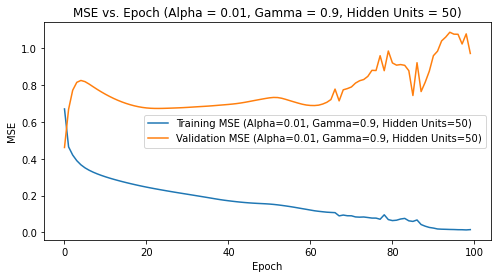

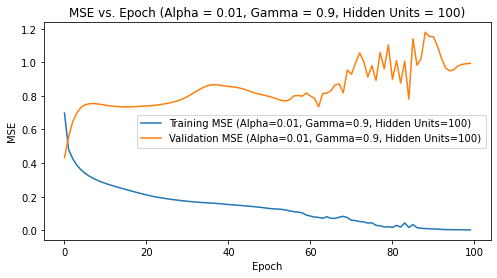

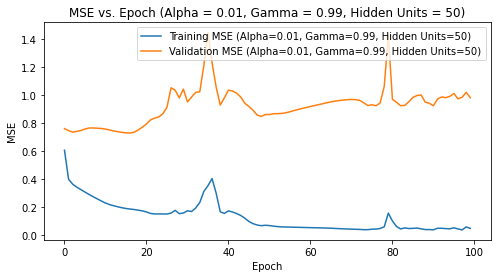

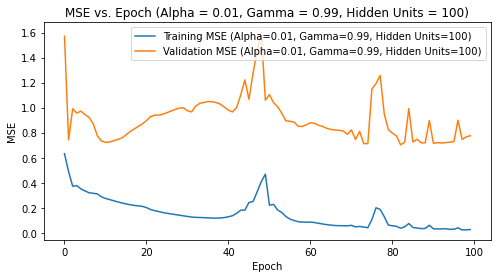

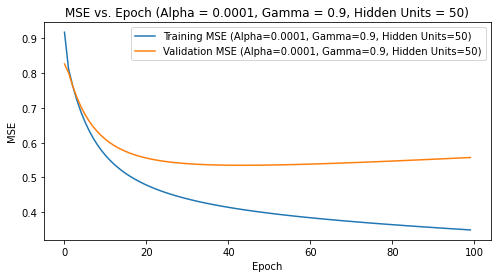

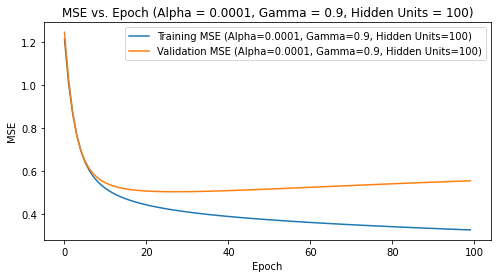

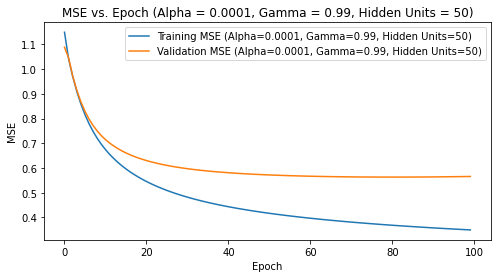

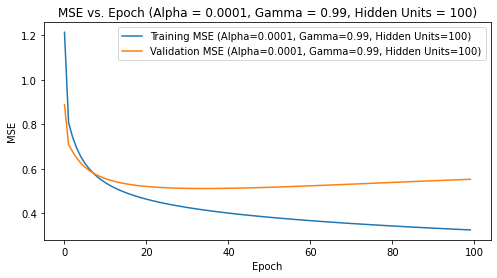

In [151]:
# Iterate over alpha, gamma, and hidden units values
for alpha in alpha_values:
    for gamma in gamma_values:
        for num_hidden_units in hidden_units_values:
            plt.figure(figsize=(8, 4))  # Adjust the figure size if needed

            # Training MSE
            mse_train_array = np.array(mse_alpha_hidden_momentum[(alpha, gamma, num_hidden_units)]['train']).reshape(-1)
            plt.plot(range(len(mse_train_array)), mse_train_array, label=f'Training MSE (Alpha={alpha}, Gamma={gamma}, Hidden Units={num_hidden_units})')

            # Validation MSE
            mse_val_array = np.array(mse_alpha_hidden_momentum[(alpha, gamma, num_hidden_units)]['val']).reshape(-1)
            plt.plot(range(len(mse_val_array)), mse_val_array, label=f'Validation MSE (Alpha={alpha}, Gamma={gamma}, Hidden Units={num_hidden_units})')

            plt.xlabel("Epoch")
            plt.ylabel("MSE")
            plt.title(f"MSE vs. Epoch (Alpha = {alpha}, Gamma = {gamma}, Hidden Units = {num_hidden_units})")
            plt.legend()

            plt.show()


In [153]:
alpha = 0.0001
gamma = 0.99
num_hidden_units = 100

# Maximum number of training epochs
max_epochs = 100

# Filter all warnings
warnings.filterwarnings("ignore")

# Initialize weights and bias
W1 = np.random.randn(num_hidden_units, num_input_units) / 6
b1 = np.random.randn(num_hidden_units, 1) / 6
W2 = np.random.randn(num_output_units, num_hidden_units) / 6
b2 = np.random.randn(num_output_units, 1) / 6

# Initialize momentum terms for each weight and bias
W1_momentum = np.zeros_like(W1)
b1_momentum = np.zeros_like(b1)
W2_momentum = np.zeros_like(W2)
b2_momentum = np.zeros_like(b2)

# Lists to store MSE values during training and validation
mse_values_train = []
mse_values_val = []

# Backpropagation training algorithm
for epoch in range(max_epochs):
    # PHASE I - Training
    mse_train = 0  # Initialize training MSE for this epoch
    for i, p in enumerate(P_TR.T):
        # Forward propagation for training
        n1 = np.dot(W1, p).reshape(-1, 1) + b1
        a1 = tansig(n1)
        n2 = np.dot(W2, a1).reshape(-1, 1) + b2
        a2 = tansig(n2)
        error = T_TR[i] - a2
        s2 = (-2) * (fdtansig(a2) * error)
        s1 = fdtansig(a1) * np.outer(W2, s2)
        
        # Calculate momentum updates
        W1_momentum = (gamma * W1_momentum) + ((1-gamma)*(alpha * np.outer(s1, p)))
        b1_momentum = gamma * b1_momentum + ((1-gamma)*(alpha * s1.reshape(-1, 1)))
        W2_momentum = (gamma * W2_momentum) + ((1-gamma)*(alpha * np.outer(s2, a1)))
        b2_momentum = gamma * b2_momentum + ((1-gamma)*(alpha * s2.reshape(-1, 1)))

        # Update weights and biases with momentum
        W1 = W1 - W1_momentum
        b1 = b1 - b1_momentum 
        W2 = W2 - W2_momentum
        b2 = b2 - b2_momentum
        
        mse_train = mse_train + (error ** 2)  # Accumulate training squared error
    
    # Calculate and store the average Training MSE for the epoch
    average_mse_train = mse_train / len(P_TR.T)
    
    mse_values_train.append(average_mse_train)
    np.set_printoptions(precision=30)
    print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

    # PHASE II - Validation
    mse_val = 0  # Initialize validation MSE for this epoch
    correct = 0
    incorrect = 0
    for i, p_val in enumerate(P_TT.T):
        # Forward propagation for validation
        n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
        a1_val = tansig(n1_val)
        n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
        a2_val = tansig(n2_val)
        if a2_val < 0:
            output = -1
        else:
            output = 1
        if (T_TT[i] == output):
            correct = correct + 1
        else:
            incorrect = incorrect + 1
        error_val = T_TT[i] - a2_val
        mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

    # Calculate and store the average validation MSE for the epoch
    average_mse_val = mse_val / len(P_TT.T)
    mse_values_val.append(average_mse_val)
    print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

print(correct)
print(incorrect)
Hit_Ratio = correct/len(P_TT.T)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")
# Print the last Training and Validation MSE values
print(f"Last Training MSE for Alpha {alpha}: {mse_values_train[-1]}")
print(f"Last Validation MSE for Alpha {alpha}: {mse_values_val[-1]}")

Epoch 1/100, Training MSE: [[1.1626544331595585]]
Epoch 1/100, Validation MSE: [[1.0696433538695926]]
Epoch 2/100, Training MSE: [[1.045420017594392]]
Epoch 2/100, Validation MSE: [[0.980847914744822]]
Epoch 3/100, Training MSE: [[0.9427217016407865]]
Epoch 3/100, Validation MSE: [[0.8826265702873506]]
Epoch 4/100, Training MSE: [[0.8618156763391994]]
Epoch 4/100, Validation MSE: [[0.8048167637719956]]
Epoch 5/100, Training MSE: [[0.7985886299622865]]
Epoch 5/100, Validation MSE: [[0.7435338197402965]]
Epoch 6/100, Training MSE: [[0.7488065649379421]]
Epoch 6/100, Validation MSE: [[0.6952265125602466]]
Epoch 7/100, Training MSE: [[0.7088132263083948]]
Epoch 7/100, Validation MSE: [[0.6567816290591312]]
Epoch 8/100, Training MSE: [[0.6759265712942664]]
Epoch 8/100, Validation MSE: [[0.6258137499656121]]
Epoch 9/100, Training MSE: [[0.6482944122528055]]
Epoch 9/100, Validation MSE: [[0.6005840518835686]]
Epoch 10/100, Training MSE: [[0.6246496270992148]]
Epoch 10/100, Validation MSE: [[0

## TRAINING & VALIDATION With Alpha = 0.0001, hidden units = 100, gamma = 0.99 using TERMEPOCHS

In [146]:
# Define the learning rate (alpha)
alpha = 0.0001
num_hidden_units = 100
gamma = 0.99

# Maximum number of training epochs
max_epochs = 100

# Number of epochs for early stopping
early_stop_epochs = 5

# Filter all warnings
warnings.filterwarnings("ignore")

# Initialize weights and bias
W1 = np.random.randn(num_hidden_units, num_input_units) / 6
b1 = np.random.randn(num_hidden_units, 1) / 6
W2 = np.random.randn(num_output_units, num_hidden_units) / 6
b2 = np.random.randn(num_output_units, 1) / 6

# Initialize momentum terms for each weight and bias
W1_momentum = np.zeros_like(W1)
b1_momentum = np.zeros_like(b1)
W2_momentum = np.zeros_like(W2)
b2_momentum = np.zeros_like(b2)

# Lists to store MSE values during training and validation
mse_values_train = []
mse_values_val = []

# Best validation MSE and corresponding model parameters
best_val_mse = float('inf')
best_W1 = None
best_b1 = None
best_W2 = None
best_b2 = None

# Backpropagation training algorithm
for epoch in range(max_epochs):
    # PHASE I - Training
    mse_train = 0  # Initialize training MSE for this epoch
    for i, p in enumerate(P_TR.T):
        # Forward propagation for training
        n1 = np.dot(W1, p).reshape(-1, 1) + b1
        a1 = tansig(n1)
        n2 = np.dot(W2, a1).reshape(-1, 1) + b2
        a2 = tansig(n2)
        error = T_TR[i] - a2
        s2 = (-2) * (fdtansig(a2) * error)
        s1 = fdtansig(a1) * np.outer(W2, s2)
        
        # Calculate momentum updates
        W1_momentum = (gamma * W1_momentum) + ((1-gamma)*(alpha * np.outer(s1, p)))
        b1_momentum = gamma * b1_momentum + ((1-gamma)*(alpha * s1.reshape(-1, 1)))
        W2_momentum = (gamma * W2_momentum) + ((1-gamma)*(alpha * np.outer(s2, a1)))
        b2_momentum = gamma * b2_momentum + ((1-gamma)*(alpha * s2.reshape(-1, 1)))

        # Update weights and biases with momentum
        W1 = W1 - W1_momentum
        b1 = b1 - b1_momentum 
        W2 = W2 - W2_momentum
        b2 = b2 - b2_momentum

        mse_train = mse_train + (error ** 2)  # Accumulate training squared error
    
    # Calculate and store the average Training MSE for the epoch
    average_mse_train = mse_train / len(P_TR.T)
    mse_values_train.append(average_mse_train)
    np.set_printoptions(precision=30)
    print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

    # PHASE II - Validation
    mse_val = 0  # Initialize validation MSE for this epoch
    correct = 0
    incorrect = 0
    for i, p_val in enumerate(P_TT.T):
        # Forward propagation for validation
        n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
        a1_val = tansig(n1_val)
        n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
        a2_val = tansig(n2_val)
        if a2_val < 0:
            output = -1
        else:
            output = 1
        if (T_TT[i] == output):
            correct = correct + 1
        else:
            incorrect = incorrect + 1
        error_val = T_TT[i] - a2_val
        mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

    # Calculate and store the average validation MSE for the epoch
    average_mse_val = mse_val / len(P_TT.T)
    mse_values_val.append(average_mse_val)
    print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

    # Check for early stopping based on validation MSE
    if epoch > early_stop_epochs and (average_mse_val >= mse_values_val[-early_stop_epochs:]).all():
        print(f"Early stopping at Epoch {epoch + 1}, Best Validation MSE: {best_val_mse}")
        break

    # Update the best model if the current model has a lower validation MSE
    if average_mse_val < best_val_mse:
        best_val_mse = average_mse_val
        best_W1 = np.copy(W1)
        best_b1 = np.copy(b1)
        best_W2 = np.copy(W2)
        best_b2 = np.copy(b2)

print(correct)
print(incorrect)
Hit_Ratio = correct/len(P_TT.T)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")
# Print the final MSE values for the best model
print(f"Final Training MSE for the Best Model: {mse_values_train[-1]}")
print(f"Final Validation MSE for the Best Model: {best_val_mse}")




Epoch 1/100, Training MSE: [[1.056202870413234]]
Epoch 1/100, Validation MSE: [[0.8175234355281005]]
Epoch 2/100, Training MSE: [[0.9134947268790934]]
Epoch 2/100, Validation MSE: [[0.7128865747392522]]
Epoch 3/100, Training MSE: [[0.8261278661250276]]
Epoch 3/100, Validation MSE: [[0.6615461719032798]]
Epoch 4/100, Training MSE: [[0.7570213524392886]]
Epoch 4/100, Validation MSE: [[0.6241916792284129]]
Epoch 5/100, Training MSE: [[0.7034102320161587]]
Epoch 5/100, Validation MSE: [[0.5966770845316683]]
Epoch 6/100, Training MSE: [[0.6617336981504147]]
Epoch 6/100, Validation MSE: [[0.576071120401967]]
Epoch 7/100, Training MSE: [[0.6289112767116084]]
Epoch 7/100, Validation MSE: [[0.5602524362048392]]
Epoch 8/100, Training MSE: [[0.6025944344790742]]
Epoch 8/100, Validation MSE: [[0.5478121629658513]]
Epoch 9/100, Training MSE: [[0.5810853366112141]]
Epoch 9/100, Validation MSE: [[0.5378178458447798]]
Epoch 10/100, Training MSE: [[0.563179459295093]]
Epoch 10/100, Validation MSE: [[0.

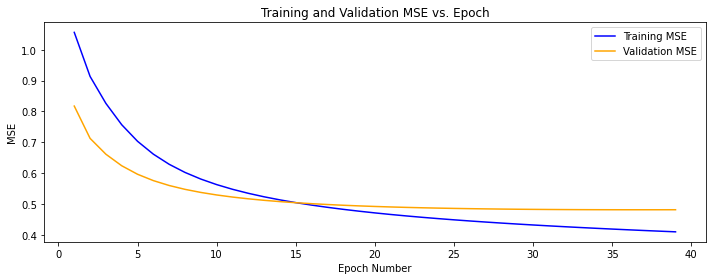

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming mse_values_train and mse_values_val are numpy arrays
mse_values_train = np.ravel(mse_values_train)
mse_values_val = np.ravel(mse_values_val)

# Plotting the learning curves
plt.figure(figsize=(10, 4))

# Plot training and validation MSE curves
plt.plot(range(1, len(mse_values_train) + 1), mse_values_train, label='Training MSE', color='blue')
plt.plot(range(1, len(mse_values_val) + 1), mse_values_val, label='Validation MSE', color='orange')

plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.title('Training and Validation MSE vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()


# TESTING for PART II

In [148]:
# Evaluate the best model on the test set
mse_test = 0
correct = 0;
incorrect = 0;
for i, p_test in enumerate(P_TS.T):
    # Forward propagation for testing using the best model
    n1_test = np.dot(best_W1, p_test).reshape(-1, 1) + best_b1
    a1_test = tansig(n1_test)
    n2_test = np.dot(best_W2, a1_test).reshape(-1, 1) + best_b2
    a2_test = tansig(n2_test)
    if a2_test < 0:
        output = -1
    else:
        output = 1
    if (T_TS[i] == output):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
    error_test = T_TS[i] - a2_test
    mse_test = mse_test + (error_test ** 2)  # Accumulate testing squared error

# Calculate and print the average testing MSE for the best model
average_mse_test = mse_test / len(P_TS.T)
print(f"Final Test MSE for the Best Model: {average_mse_test}")
print(correct)
print(incorrect)
Hit_Ratio = correct/len(P_TS.T)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Final Test MSE for the Best Model: [[0.36240463869221184]]
61
6
0.9104477611940298
Accuracy: 91.04%
